In [4]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

import numpy as np
font = {'family':'serif','size':12}

In [5]:
#Use the fit a and phi values from the individual qubit sheets. In our case, these numbers are:

a0=0.9576010234699609
phi0=0.11992234340291748

a1=0.9706948287481036
phi1=-0.09944192150913157

a2=0.9887970966750064
phi2=-0.10480004808192273

a3=0.9915306560628733
phi3=-0.09655475220300411

a4=0.974427624970788
phi4=-0.12839620615688072

In [6]:
#Define the ideal charging curve
def sin2_func(x, a,b):
    y = a*np.sin(x/2)**2+2*np.sqrt(a)*np.sqrt(1-a)*np.sin(b)*np.sin(x/2)*np.cos(x/2)+(1-a)*np.cos(x/2)**2
    return y

In [7]:
theta = np.linspace(0, np.pi, 1600)
fit0=sin2_func(theta,a0,phi0)
fit1=sin2_func(theta,a1,phi1)
fit2=sin2_func(theta,a2,phi2)
fit3=sin2_func(theta,a3,phi3)
fit4=sin2_func(theta,a4,phi4)

sin_ideal= np.sin(theta/2)**2

In [8]:
from fractions import Fraction
import matplotlib.ticker as ticker

#Function to get pi axis labels 
def pi_axis(value, tick_number):
    if np.isclose(value, 0):  
        return '0'
    elif np.isclose(value, np.pi): 
        return r'$\pi$'
    else:
        frac = Fraction(value / np.pi).limit_denominator(8)  
        if frac == 1:
            return r'$\pi$'
        elif frac == -1:
            return r'$-\pi$'
        else:
            if frac.numerator == 1:
                return r'$\frac{\pi}{' + f"{frac.denominator}" + r'}$'
            elif frac.numerator == -1:
                return r'$\frac{-\pi}{' + f"{frac.denominator}" + r'}$'
            else:
                return r'$\frac{' + f"{frac.numerator}\pi" + r'}{' + f"{frac.denominator}" + r'}$'


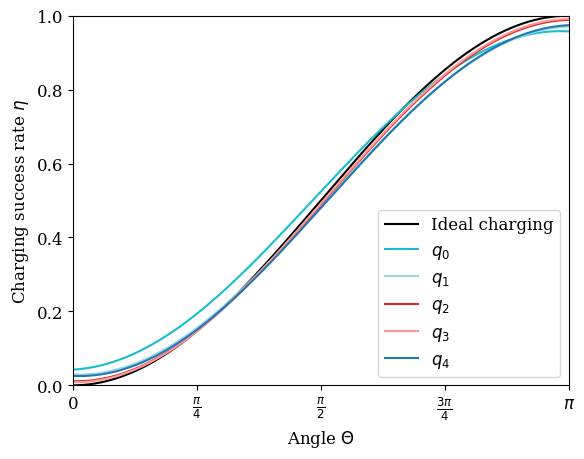

In [9]:
tick_positions = np.linspace(0, np.pi, 5)

formatter = ticker.FuncFormatter(pi_axis)
plt.gca().xaxis.set_major_formatter(formatter)
plt.xticks(tick_positions)

plt.xlim(0, np.pi)
plt.ylim(0, 1)


plt.xlim(0, np.pi)
plt.ylim(0, 1)


plt.xticks(font=font)
plt.yticks(font=font)

plt.plot(theta,sin_ideal,color='black')
plt.plot(theta,fit0,color="#17BECF")
plt.plot(theta,fit1,color="#9EDAE5")
plt.plot(theta,fit2,color="#D62728")
plt.plot(theta,fit3,color="#FF9896")
plt.plot(theta,fit4,color="#1F77B4")


plt.xlabel("Angle $\\Theta$",**font)
plt.ylabel("Charging success rate $\eta$",**font)
plt.legend(["Ideal charging", "$q_0$","$q_1$","$q_2$","$q_3$","$q_4$"], prop=font, loc="lower right")

plt.savefig('charging-starmon-5-all.png')